In [57]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
%matplotlib inline

In [1]:
df = pd.read_csv("附件.csv",encoding="gbk")#一开始可能要用 gbk 后面重新保存为csv，可以用utf-8了
print("数据总量：%d" % len(df))
df.head()

数据总量：42816


,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.0,4.0,2.0,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.0,3.0,0.5,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.0,6.5,8.3,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,否


In [2]:
# 任务 1.1 对数据作必要的预处理，在报告中列出处理步骤，将处理后的结 果保存为“task1_1.csv”。

In [3]:
# d = df[df['销售数量'].isnull()] # '销售数量'中的缺失项
d = df[df.isnull().values==True] # 所有行中的空值的行
d

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
8180,935,21,冲调,2106,蜂蜜/面包酱,210601,蜂蜜,20150121,201501,DW-2106010189,牛魔空版,12g*8,一般,NaN,1.0,9.9,9.9
26902,1978,21,冲调,2106,蜂蜜/面包酱,210601,蜂蜜,20150315,201503,DW-2106010189,牛魔空版,12g*8,一般,NaN,1.0,9.9,9.9


In [4]:
# df.dropna()
# df = df.drop(df[(df['销售数量']<0.001) | (df['销售数量']>100000)].index) #删除数量不符合常识的数据
# df = df[df['销售金额'] == df['销售数量']* df['商品单价']] #销售数量与销售金额之间关系正确的
# print("数据总量：%d" % len(df))
# df.head()
# # r_d.to_csv("task1_1.csv")#保存

In [5]:
# 任务 1.2 统计每个大类商品的销售金额，将结果保存为“task1_2.csv”。

In [6]:
d = df.groupby(['大类名称'],as_index=False)['销售金额'].sum() #as_index不让大类名称作为索引
d

,大类名称,销售金额
0,休闲,74145.20
1,冲调,13957.60
2,家居,6311.10
3,家电,853.90
4,文体,1970.30
5,日配,81958.30
6,水产,2891.00
7,洗化,38013.80
8,烘焙,110.90
9,熟食,5939.94


In [7]:
# 任务 1.3 统计每个中类商品的促销销售金额和非促销销售金额，将结果保 存为“task1_3.csv”。

In [8]:
ture_df = df[df['是否促销'] == '是'] 
false_df = df[df['是否促销'] == '否'] 
## shoe = t[t['中类名称'] == '拖鞋']
ture_df = ture_df.groupby(['中类名称'],as_index = False)['销售金额'].sum()
false_df = false_df.groupby(['中类名称'],as_index = False)['销售金额'].sum()
print("数据总量：%d" % (len(ture_df) + len(false_df)))


数据总量：278


In [9]:
d = pd.merge(ture_df,false_df,on = "中类名称") #拼接俩个对象的图
d

,中类名称,销售金额_x,销售金额_y
0,一次性用品,70.90,727.30
1,乳饮料,673.50,1972.40
2,五谷杂粮,2935.72,9798.35
3,保养用品,77.30,1753.40
4,保温容器,117.90,28.00
...,...,...,...
97,酱菜类,155.40,2271.95
98,鞋类护理用品,12.90,175.20
99,食用油,7950.30,5018.60
100,饼干,2844.42,9823.53


In [10]:
# 任务 1.4 统计生鲜类产品和一般产品的每周销售金额，将结果保存为 “task1_4.csv”。

In [11]:
#销售日期是否连续,并且排除其他类型
date = df.groupby(['商品类型','销售月份','销售日期'],as_index=False)['销售金额'].sum()
date = date[date['商品类型']!= '联营商品' ]
date = date[date['商品类型'] !='12g*8']
date

,商品类型,销售月份,销售日期,销售金额
2,一般商品,201501,20150101,2160.70
3,一般商品,201501,20150102,2650.60
4,一般商品,201501,20150103,1678.91
5,一般商品,201501,20150104,1989.65
6,一般商品,201501,20150105,2305.75
...,...,...,...,...
230,生鲜,201504,20150426,1048.93
231,生鲜,201504,20150427,912.09
232,生鲜,201504,20150428,637.61
233,生鲜,201504,20150429,1749.99


In [12]:
#一般商品类型
normal = date[date['商品类型'] == '一般商品']
normal_goods = []
count = 0 #索引
all_weeks = int(len(normal)/7) + 1 
for weeks in range(1,all_weeks + 1): 
    sum_money = 0
    info = {}
    for j in range(0,7):
        if count < len(normal):
            sum_money = sum_money + normal.iloc[count]['销售金额'] #选取date对象的指定数字的行的某个列的值
            str_type = normal.iloc[count]['商品类型']
            count = count + 1
    info['周数'] = weeks 
    info['商品类型'] = str_type
    info['销售金额'] = sum_money
    normal_goods.append(info)
normal_goods = pd.DataFrame(normal_goods)#生成新的DF对象
normal_goods

,周数,商品类型,销售金额
0,1,一般商品,17369.98
1,2,一般商品,18245.82
2,3,一般商品,18651.03
3,4,一般商品,20430.03
4,5,一般商品,29379.50
5,6,一般商品,29001.47
6,7,一般商品,48351.00
7,8,一般商品,13742.54
8,9,一般商品,12429.54
9,10,一般商品,14562.27


In [13]:
#生鲜商品类型
alive = date[date['商品类型'] == '生鲜']
alive_goods = []
count = 0 #索引
all_weeks = int(len(alive)/7) + 1 
for weeks in range(1,all_weeks + 1): 
    sum_money = 0
    info = {}
    for j in range(0,7):
        if count < len(alive):
            sum_money = sum_money + alive.iloc[count]['销售金额'] #选取date对象的指定数字的行的某个列的值
            str_type = alive.iloc[count]['商品类型']
            count = count + 1
    info['周数'] = weeks 
    info['商品类型'] = str_type
    info['销售金额'] = sum_money
    alive_goods.append(info)
alive_goods = pd.DataFrame(alive_goods)
alive_goods

,周数,商品类型,销售金额
0,1,生鲜,6146.66
1,2,生鲜,6033.68
2,3,生鲜,8393.59
3,4,生鲜,9975.00
4,5,生鲜,4598.95
5,6,生鲜,7231.42
6,7,生鲜,8048.29
7,8,生鲜,3041.81
8,9,生鲜,5257.34
9,10,生鲜,6970.78


In [14]:
d = pd.merge(normal_goods,alive_goods,on = "周数")  #拼接
#d.to_csv("task1_4.csv")
d

,周数,商品类型_x,销售金额_x,商品类型_y,销售金额_y
0,1,一般商品,17369.98,生鲜,6146.66
1,2,一般商品,18245.82,生鲜,6033.68
2,3,一般商品,18651.03,生鲜,8393.59
3,4,一般商品,20430.03,生鲜,9975.00
4,5,一般商品,29379.50,生鲜,4598.95
5,6,一般商品,29001.47,生鲜,7231.42
6,7,一般商品,48351.00,生鲜,8048.29
7,8,一般商品,13742.54,生鲜,3041.81
8,9,一般商品,12429.54,生鲜,5257.34
9,10,一般商品,14562.27,生鲜,6970.78


In [15]:
# 任务 1.5 统计每位顾客每月的消费额及消费天数，将结果保存为“task1_5.csv”，并在报告中列出用户编号为 0-10 的结果。 

In [16]:
person_first = df.groupby(['顾客编号','销售月份','销售日期'],as_index=False)['销售金额'].sum()
person_first.rename(columns={'销售金额':'消费额','销售月份':'月份','销售日期':'日期'},inplace=True)#修改DF对象里的列名,True为真正修改
person_month = person_first.groupby(['顾客编号','月份'],as_index=False)['消费额'].sum()
person_month


,顾客编号,月份,消费额
0,0,201501,11.05
1,0,201504,13.60
2,1,201501,12.30
3,1,201502,30.30
4,2,201501,48.70
...,...,...,...
4471,2607,201504,25.17
4472,2608,201504,59.88
4473,2609,201504,30.80
4474,2610,201504,15.80


In [17]:
dic = { 201501 :'1月', 201502:'2月' , 201503 :'3月' ,201504 :'4月'}
#person_month.replace(dic,inplace = True) #True为确定源数据的修改
pd.set_option('display.max_columns',20)#后者参数设为None显示所有列
pd.set_option('display.max_rows',30)#后者参数设为None显示所有行
person_month = person_month[person_month['顾客编号'] < 11]
person_month

,顾客编号,月份,消费额
0,0,201501,11.05
1,0,201504,13.60
2,1,201501,12.30
3,1,201502,30.30
4,2,201501,48.70
5,2,201502,30.00
6,3,201501,67.39
7,3,201502,360.97
8,3,201503,68.87
9,3,201504,49.28


In [18]:
person_days = person_first.groupby(['顾客编号','月份'],as_index=False)['日期'].count() #对日期次数进行计数
p = person_days[person_days['顾客编号'] < 11]
p

,顾客编号,月份,日期
0,0,201501,1
1,0,201504,1
2,1,201501,1
3,1,201502,1
4,2,201501,2
5,2,201502,1
6,3,201501,3
7,3,201502,4
8,3,201503,7
9,3,201504,4


In [19]:
#任务 2.1 绘制生鲜类商品和一般商品每天销售金额的折线图,并分析比较两类产品的销售状况。

In [20]:
#因为有一天没有卖生鲜，后面画图时无法共用X轴，所以人为添加一个数据
for i in range(len(normal['销售日期'])):
    if list(alive['销售日期'])[i] != list(normal['销售日期'])[i]:
        print(list(normal['销售日期'])[i])
        break

alive.loc['new'] = ['生鲜','201502','20150229','700.0']#人为添加一个数据

20150229


/Users/shanshan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
d= {'商品类型': '生鲜',
        '销售月份': '201502',
        '销售日期':'20150229',
        '销售金额': 0,
       
        }
a= pd.DataFrame.from_dict(d,orient='index').T
              
# alive=alive.append(a) #运行一次后注释
alive[['销售日期']] = alive[['销售日期']].astype(int)
alive= alive.sort_values(by=['销售日期'],ascending=True)
alive

/Users/shanshan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,商品类型,销售月份,销售日期,销售金额
119,生鲜,201501,20150101,676.61
120,生鲜,201501,20150102,870.83
121,生鲜,201501,20150103,669.44
122,生鲜,201501,20150104,574.66
123,生鲜,201501,20150105,835
...,...,...,...,...
230,生鲜,201504,20150426,1048.93
231,生鲜,201504,20150427,912.09
232,生鲜,201504,20150428,637.61
233,生鲜,201504,20150429,1749.99


In [22]:
normal

,商品类型,销售月份,销售日期,销售金额
2,一般商品,201501,20150101,2160.70
3,一般商品,201501,20150102,2650.60
4,一般商品,201501,20150103,1678.91
5,一般商品,201501,20150104,1989.65
6,一般商品,201501,20150105,2305.75
...,...,...,...,...
114,一般商品,201504,20150426,3271.11
115,一般商品,201504,20150427,1626.48
116,一般商品,201504,20150428,1982.43
117,一般商品,201504,20150429,4152.75


In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import mlab
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
%matplotlib inline

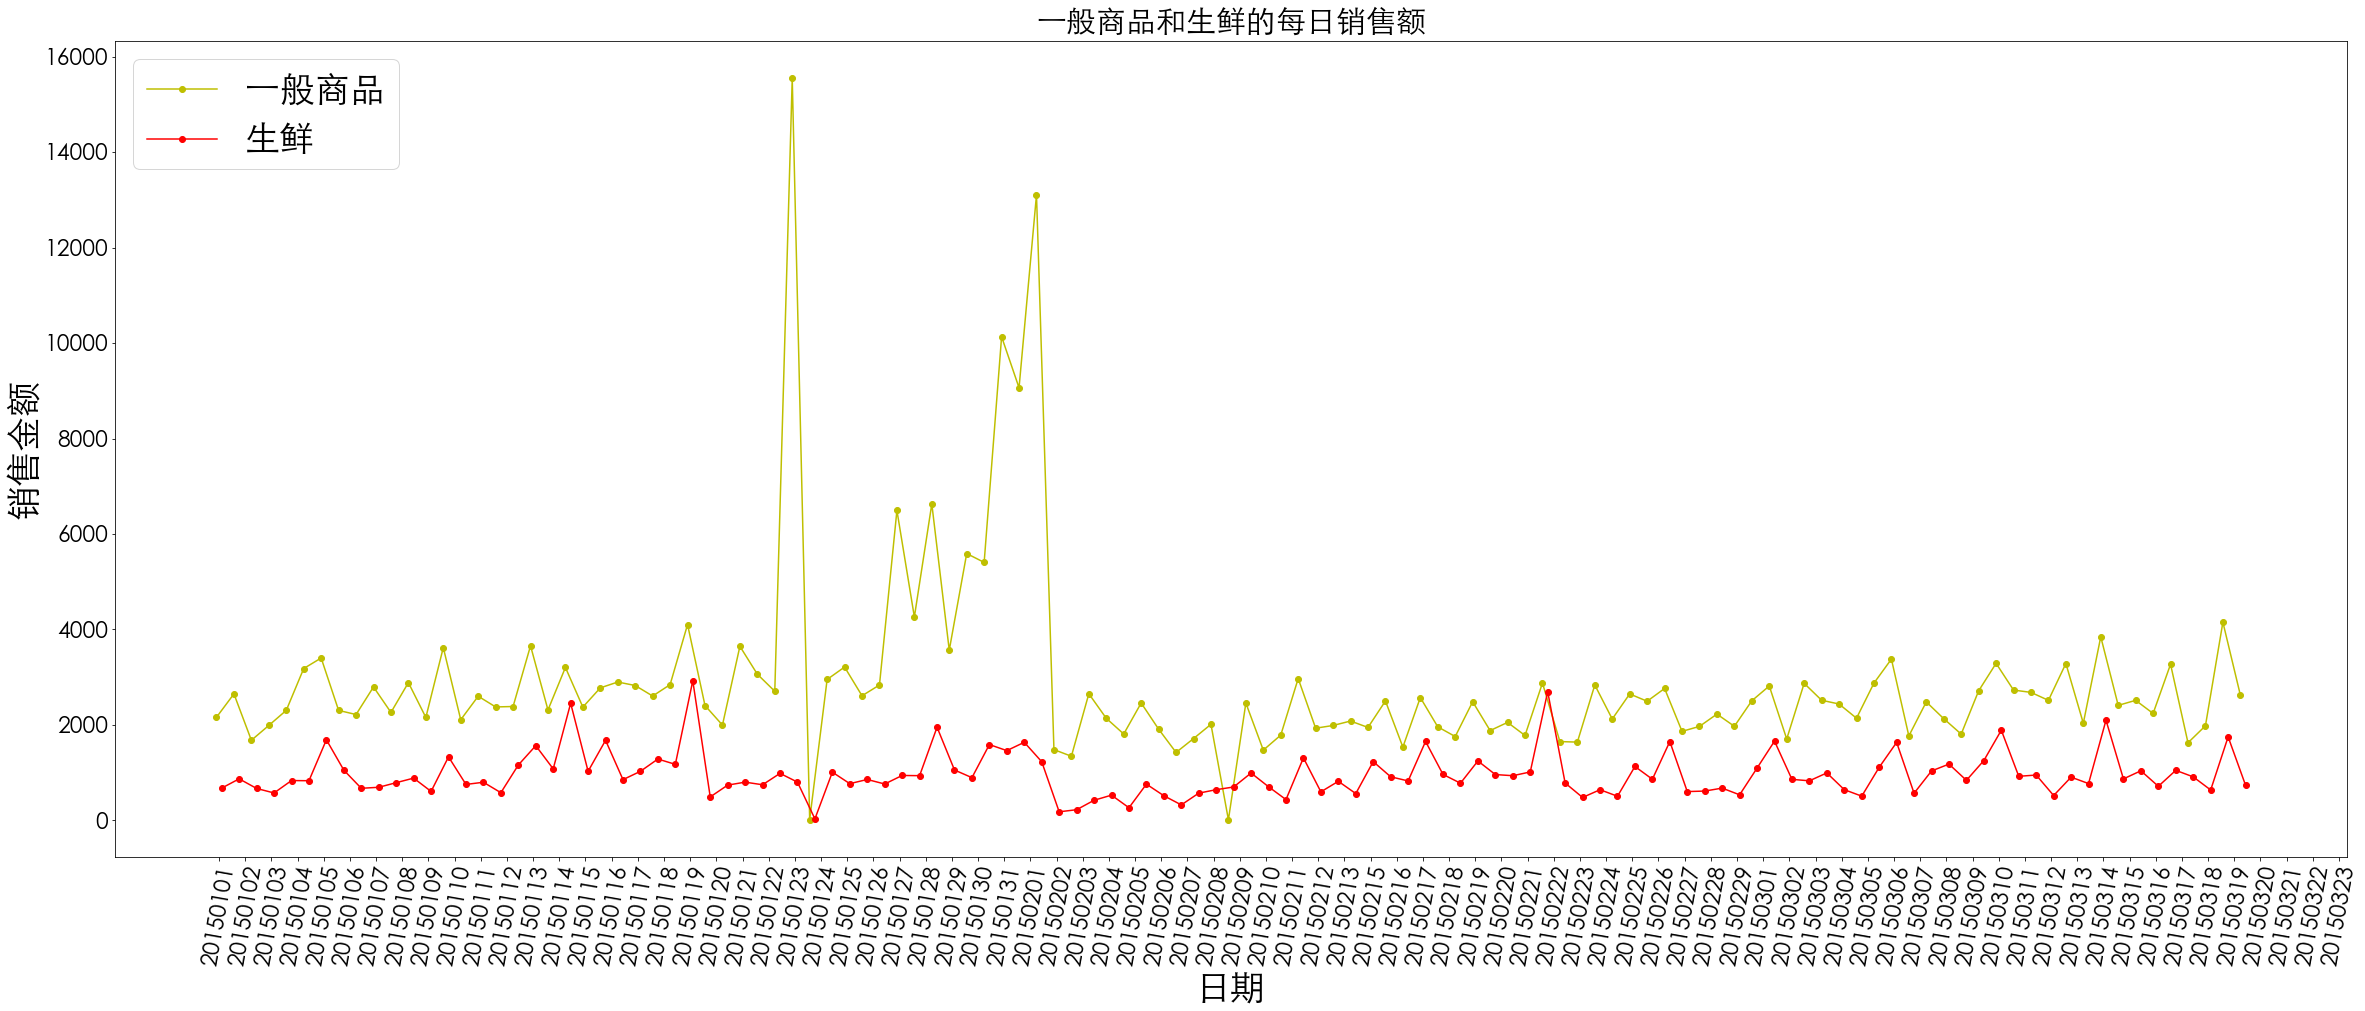

In [39]:
plt.rcParams['font.sans-serif'] = ['STHeiti'] #windows用‘SimHei’字体，mac得用‘STHeiti’
#字体报错的具体解决办法 https://blog.csdn.net/alicelmx/article/details/81231803
plt.rcParams['axes.unicode_minus'] = False     # 正常显示负号

rn = normal['销售日期']#横坐标的内容

fig, ax1 = plt.subplots(figsize=(40,15))
x = np.arange(len(rn))
xticks1 = list(rn)

ax1.axes.set_xlabel("日期", fontsize=35) #设置x
ax1.axes.set_ylabel("销售金额",fontsize=35)  #设置y

plt.tick_params(axis = 'both',labelsize = 23) #一些组件的位置参数
plt.xticks(1.5 * x,xticks1,rotation = 80)
plt.title("一般商品和生鲜的每日销售额",verticalalignment='bottom',fontsize=30) #标签

# 折线图
z0 = np.array(normal['销售金额'])
z1 = np.array(alive['销售金额'])
p0 = ax1.plot(x-0.15,z0,c='y',marker='o') #黄色
p1 = ax1.plot(x+0.15,z1,c='r',marker='o') #红色


plt.legend((p0[0],p1[0]), ('一般商品', '生鲜'),loc = 2,prop = {'size':35}) #增加图例标示

# 保存成图片
plt.savefig("每日销售金额.png",format='png', dpi=300)

plt.show()

In [24]:
# 任务 2.2 按月绘制各大类商品销售金额的占比饼图，并分析其销售状况。

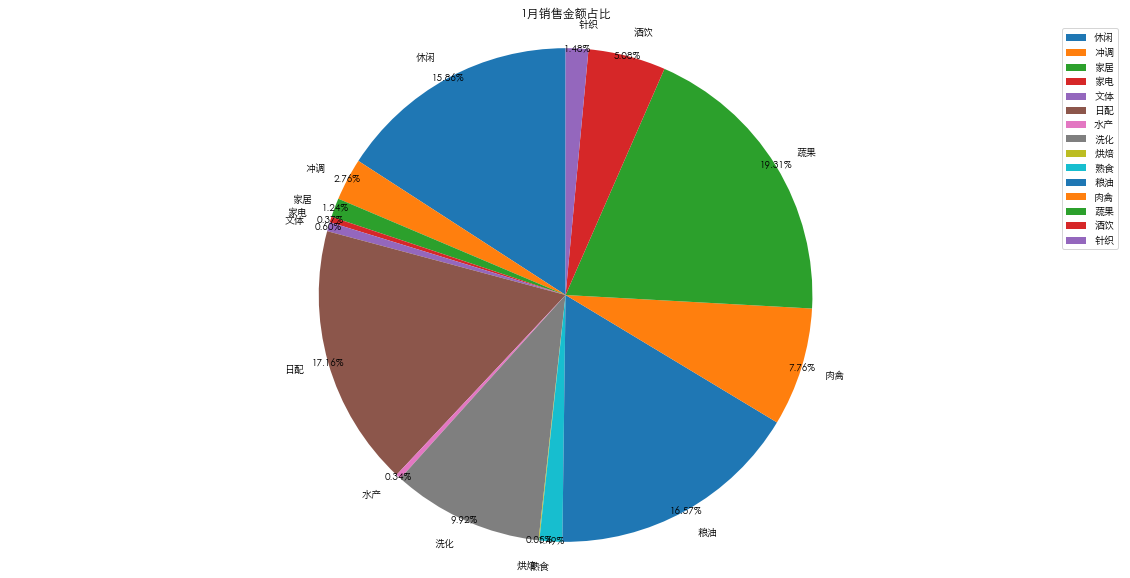

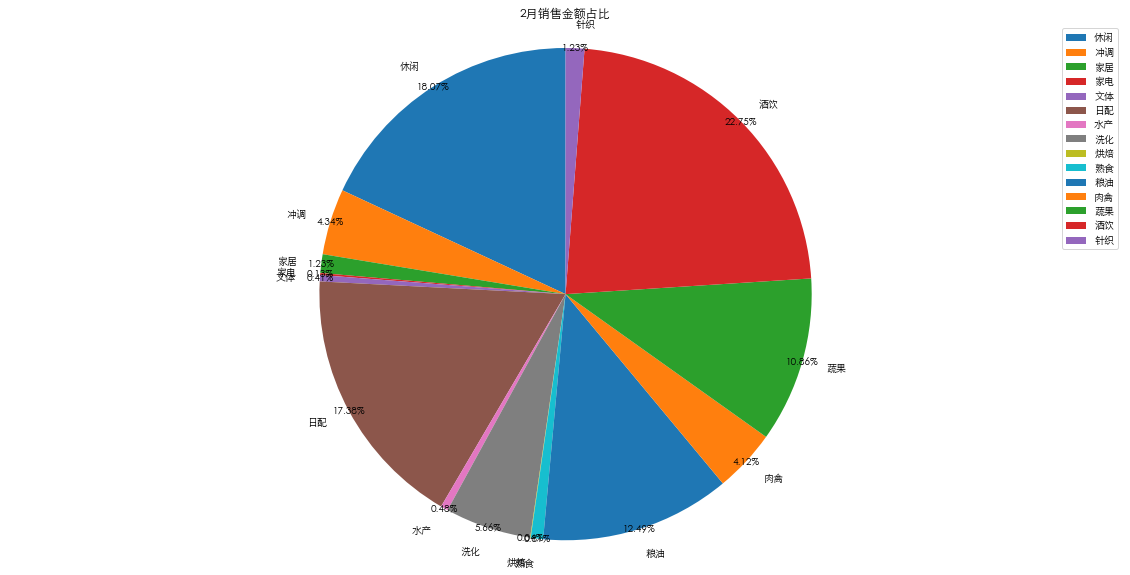

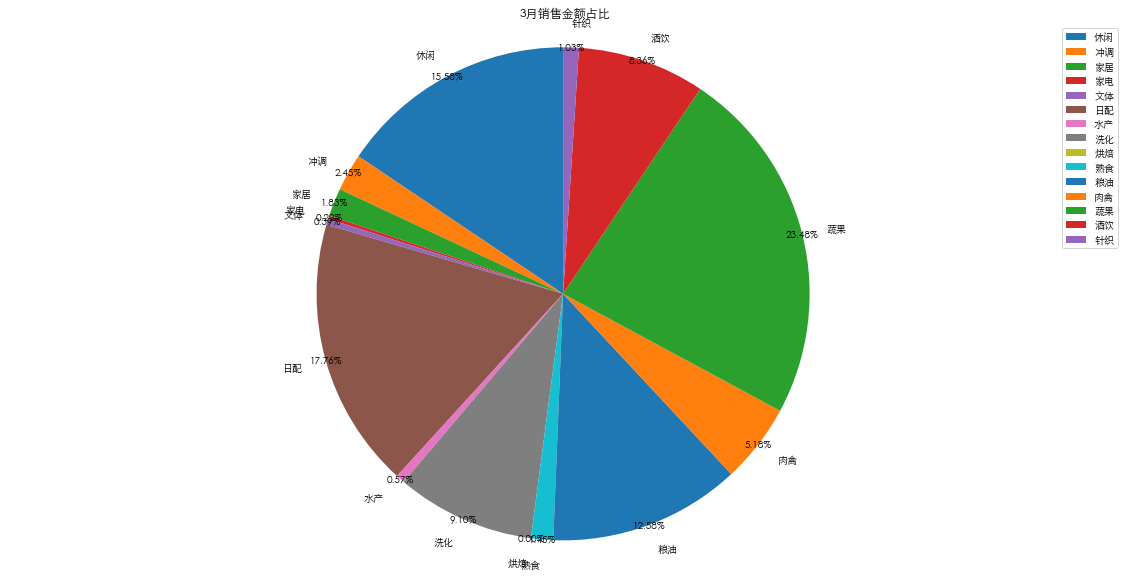

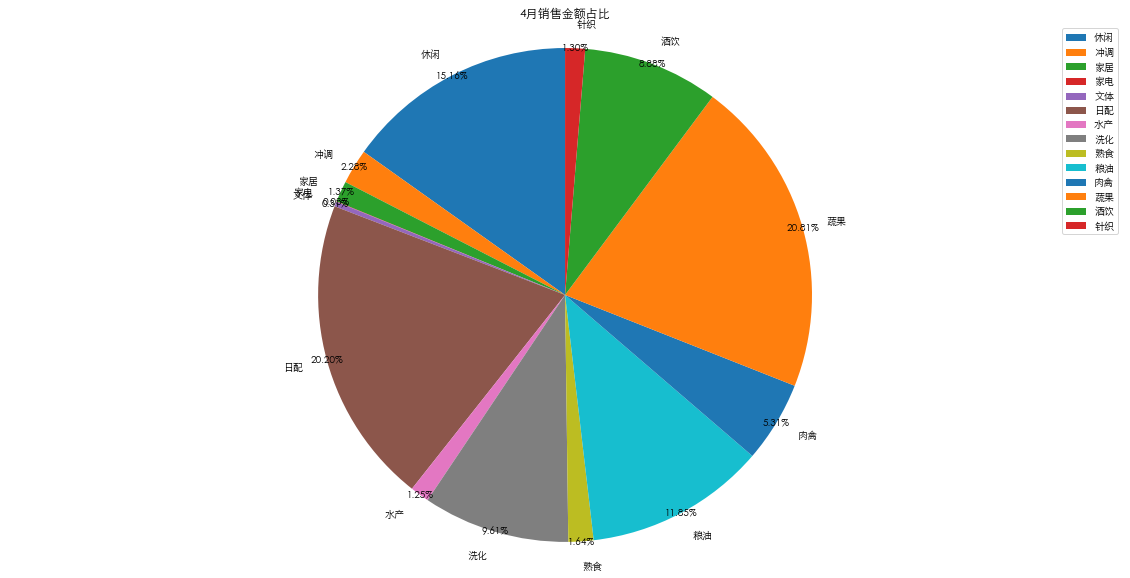

In [41]:
month = []
for i in range(0, 4):
    month.append(df[df["销售月份"] == (201501 + i)])

sum_money = [] #销售金额
data = []

for i in range(0, 4):
    sum_money.append(
        pd.pivot_table(data = month[i], index=["大类名称"], values=["销售金额"], fill_value=0, aggfunc=[np.sum, len]))
    data.append(pd.DataFrame({"大类名称": sum_money[i].index, "月销售总额": sum_money[i].iloc[:, 0]}))

plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
labels = []
sizes = []

for i in range(0, 4):
    fig=plt.figure(figsize=(20,10)) #画图尺寸
    labels.append(list(data[i]["大类名称"]))
    sizes.append(list(data[i]["月销售总额"]))
    plt.pie(sizes[i], labels = labels[i],labeldistance = 1.1, autopct = '%1.2f%%', shadow = False, startangle = 90,
                pctdistance = 1.0)    #画饼图（数据，数据对应的标签，百分数保留两位小数点）
    plt.axis('equal')
    plt.title(str(i + 1) + "月销售金额占比")
    plt.legend()
    fig.savefig("大类商品销售额{0}占比图.png".format(i + 1),format='png',dpi=300)        
    plt.show()

In [25]:
#任务 2.3 绘制促销商品和非促销商品销售金额的周环比增长率柱状图。（环比增长率，一般是指和上期相比较的增长率。
#环比增长率=(本期的某个指标的值-上一期这个指标的值)/上一期这个指标的值*100%。）

In [45]:
data_csv = df.groupby(['销售月份','销售日期','是否促销'],as_index=False)['销售金额'].sum()
day = set(data_csv['销售日期'])
yes = []
weeks = 0
count = 0
for i in range(int(len(day)/7)+1): 
    sum_money = 0
    info = {}
    for j in range(7):
        if count < len(day):
            str_type = data_csv.iloc[count]['是否促销']
            if str_type=='是':
                sum_money = sum_money + data_csv.iloc[count]['销售金额']
            count += 1
    weeks += 1
    info['周数'] = weeks
    info['是否促销'] = '是'
    info['销售金额'] = sum_money
    yes.append(info)

df_yes = pd.DataFrame(yes)
df_yes

,周数,是否促销,销售金额
0,1,是,1396.69
1,2,是,2922.00
2,3,是,1518.41
3,4,是,3579.07
4,5,是,1558.15
5,6,是,2039.02
6,7,是,3883.52
7,8,是,2358.85
8,9,是,4223.77
9,10,是,5502.35


In [46]:
data_csv = df.groupby(['销售月份','销售日期','是否促销'],as_index=False)['销售金额'].sum()
day = set(data_csv['销售日期'])
no = []
weeks = 0
count = 0
for i in range(int(len(day)/7)+1): 
    sum_money = 0
    info = {}
    for j in range(7):
        if count < len(day):
            str_type = data_csv.iloc[count]['是否促销']
            if str_type == '否':
                sum_money = sum_money + data_csv.iloc[count]['销售金额']
            count += 1
    weeks += 1
    info['周数'] = weeks
    info['是否促销'] = '否'
    info['销售金额'] = sum_money
    no.append(info)

df_no = pd.DataFrame(no)
df_no

,周数,是否促销,销售金额
0,1,否,9793.60
1,2,否,9986.30
2,3,否,11110.83
3,4,否,8389.79
4,5,否,10980.09
5,6,否,11558.63
6,7,否,9117.93
7,8,否,14949.96
8,9,否,7695.97
9,10,否,18523.35


In [47]:
#数据导入折线图前的处理
df_yes_data = round(df_yes['销售金额'].pct_change(),3)#pct_change()方法计算当前元素与先前元素之间的百分比变化
df_no_data = round(df_no['销售金额'].pct_change(),3)#保留3位小数
df_yes_data[0] = 0
df_no_data[0] = 0

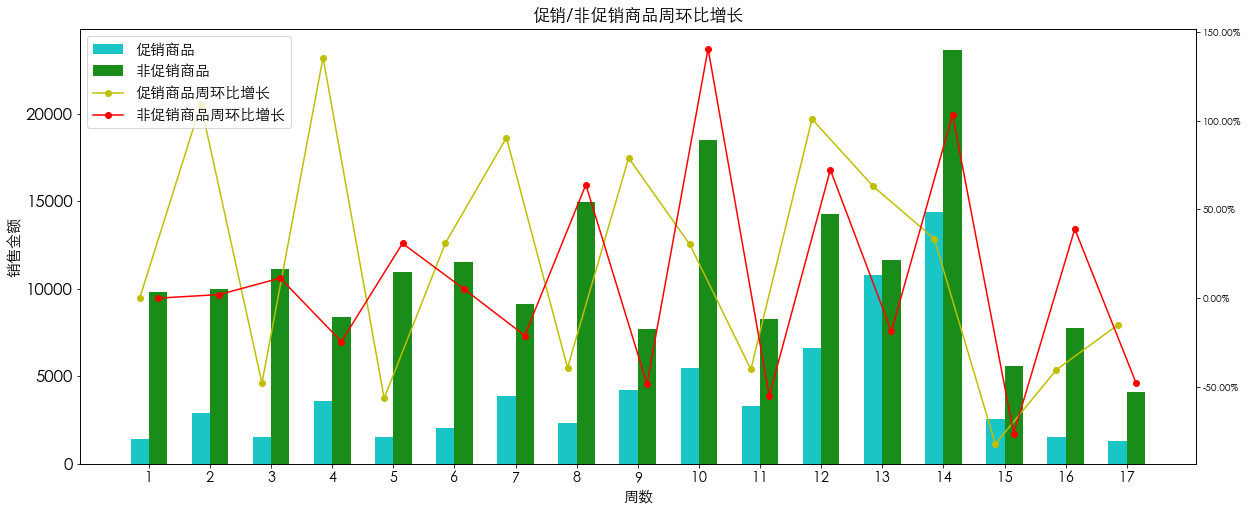

In [56]:
plt.rcParams['font.sans-serif'] = ['STHeiti'] # 指定默认字体 
plt.rcParams['axes.unicode_minus']= False     # 正常显示负号

rn = df_yes['周数']#横坐标的内容
vbar1 = df_yes['销售金额']#   2014的条形图的y轴数据,在图上显示时均保留两位
vbar2 = df_no['销售金额']#   2015的条形图的y轴数据
fig, ax1 = plt.subplots(figsize=(20,8))
x = np.arange(len(rn))
y = np.array(list(vbar1))
w = np.array(list(vbar2))
xticks1 = list(rn)

ax1.axes.set_xlabel(u"周数", fontsize=15)
ax1.axes.set_ylabel(u"销售金额",fontsize=15)  # 设置x 坐标label

#柱状图
p1 = plt.bar(x-0.15,y,width = 0.3,align='center',color = 'c',alpha=0.9) #color
p2 = plt.bar(x+0.15,w,width = 0.3,align='center',color = 'g',alpha=0.9)

plt.tick_params(axis = 'both',labelsize=17)
plt.xticks(x,xticks1,size='x-large')
plt.title("促销/非促销商品周环比增长",verticalalignment='bottom',fontsize=17)

# 折线图
ax2 = ax1.twinx()
z = np.array(df_yes_data)

z1 = np.array(df_no_data)
p3 = ax2.plot(x-0.15,z,c='y',marker='o')
p4 = ax2.plot(x+0.15,z1,c='r',marker='o')

#将坐标轴的值变成百分比
def to_percent(temp, position):
    return '%.2f'%(100 * temp) + '%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

#增加图例
plt.legend((p1[0], p2[0],p3[0],p4[0]),('促销商品', '非促销商品','促销商品周环比增长','非促销商品周环比增长')
           ,loc = 2,prop = {'size':15})

# 保存成图片
plt.savefig("环比.png",format = 'png',dpi =300)
plt.show()


In [26]:
# 任务 3.1 根据消费情况，分别为累计消费前 10 的顾客画像。

           消费总额  消费数量
小类名称                 
其它水果      12.50     1
功能盐        2.30     1
叶菜        12.33     5
名酒      8880.00     2
国产省外香烟  4200.00     1
女毛裤       30.00     1
女羽绒服      44.90     1
成人牙膏       3.90     1
新鲜蛋品      27.45     3
无芯纸       12.90     1
玉米油       85.90     1
瓜类         2.90     1
笋类         4.00     2
米制点心       6.12     1
花果        12.22     1
花生油      155.00     1
蕉类         7.59     1
藕/葛藤粉     25.70     1
调和油       49.90     1
豆干豆皮       2.25     1
鲜猪肉       18.00     1
鲜调味        1.20     1
          消费总额  消费数量
小类名称                
一次性垃圾袋    7.00     1
中式糕点     56.59     6
其他即食熟制品  10.61     2
其他液体调料    3.90     1
其他炒货     11.83     1
...        ...   ...
锅刷        5.00     1
预调酒      13.00     2
餐具清洁剂    15.90     1
香辛粉      15.40     2
麦片/粉     25.50     1

[118 rows x 2 columns]
           消费总额  消费数量
小类名称                 
一次性垃圾袋    14.00     2
其他煮食面/粉    1.70     1
其他糕点      20.80     2
其他饼干      16.90     1
冰糖         9.50     1
...         ...   ...

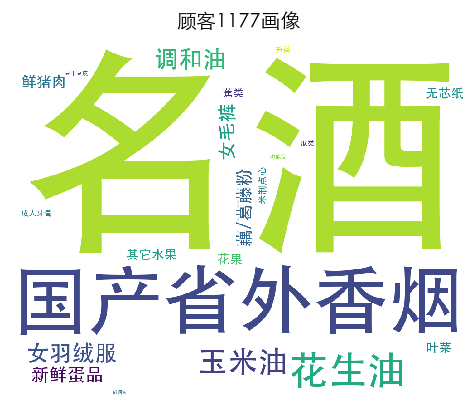

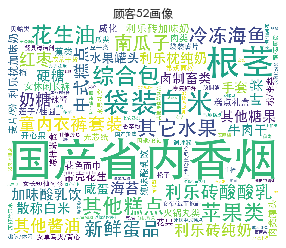

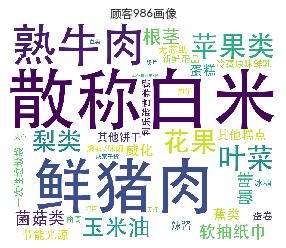

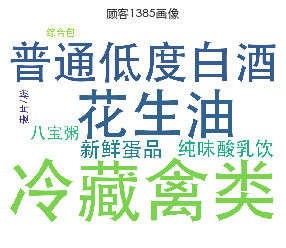

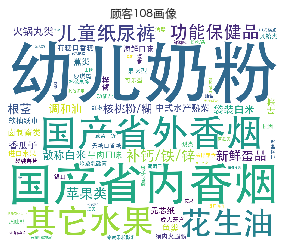

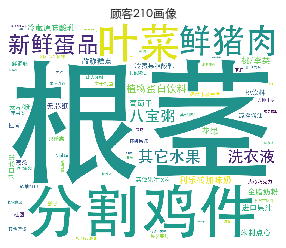

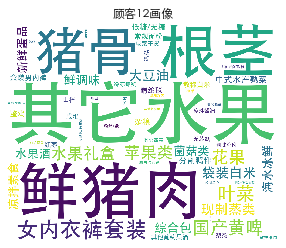

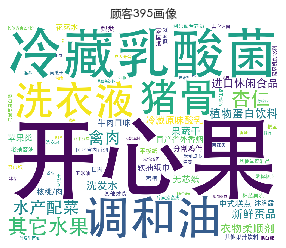

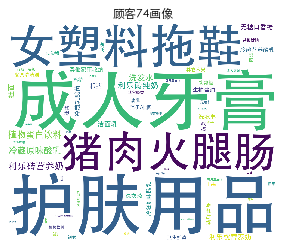

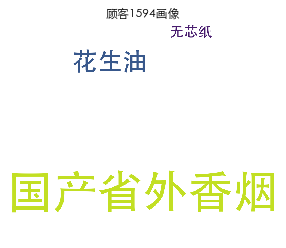

In [62]:
consume_top = pd.pivot_table(data = df,index=["顾客编号"],values=["销售金额"],fill_value=0,aggfunc=[np.sum,len])
#列出每名顾客的消费总金额与消费次数
content = pd.DataFrame({"消费总额":consume_top.iloc[:,0]}) #将销售金额切片列出，改为消费总额
consume_sort = content.sort_values(by="消费总额",ascending = False) #降序排列
consume_top10 = consume_sort.head(10)
head_top10 = list(consume_top10.index) # #获取前10编号
person_top10=[]
#获取这些顾客的消费信息
for i in range(0,len(head_top10)):
    person_top10.append(df[df["顾客编号"] == head_top10[i]])

object_top10 = []
object_list = []

for i in range(0,len(head_top10)):
    object_top10 . append(pd.pivot_table(data = person_top10[i],index=["小类名称"],values=["销售金额"],fill_value=0,aggfunc=[np.sum,len]))
    object_list .append(pd.DataFrame({"消费总额":object_top10 [ i].iloc[:,0],"消费数量":object_top10 [ i].iloc[:,1]}))
    print(object_list [i])

#画出按照顾客购买物比列的词图

plt.figure( dpi = 120)
plt.rcParams['font.sans-serif'] = ['STHeiti'] #用来正常显示中文标签
font  =  r'/System/Library/AssetsV2/com_apple_MobileAsset_Font6/bf625d290b705582d5fd619878281f3325b075d0.asset/AssetData/STHEITI.ttf'
wc  =  WordCloud(font_path  = font, #如果是中文必须要添加这个，否则会显示成框框
                background_color  =  'white',
                max_words  =  200, # 最多显示词数
                max_font_size  =  500, # 字体最大值
                width = 1000,
                height = 800,
                )

for i in range(0,len(head_top10)):#词云图
        wc.generate_from_frequencies(object_list[i]["消费总额"])
        plt.title("顾客"+str(head_top10[i])+"画像")
        plt.imshow(wc)  #用plt显示图片
        plt.axis('off') #不显示坐标轴
        plt.show()

In [27]:
# 任务 3.2 分析各大类商品的销售情况，总结其销售规律。

Index(['顾客编号', '大类编码', '大类名称', '中类编码', '中类名称', '小类编码', '小类名称', '销售日期', '销售月份',
       '商品编码', '规格型号', '商品类型', '单位', '销售数量', '销售金额', '商品单价', '是否促销'],
      dtype='object')
0        蔬果
1        粮油
2        日配
3        日配
4        日配
         ..
42811    蔬果
42812    蔬果
42813    洗化
42814    蔬果
42815    酒饮
Name: 大类名称, Length: 42816, dtype: object
[          sum  len
         销售数量 销售数量
销售日期              
20150101    4    4
20150102    2    2
20150103    2    2
20150104    1    1
20150105    7    7
...       ...  ...
20150426    8    8
20150427    7    7
20150428    2    2
20150429    7    7
20150430    5    5

[112 rows x 2 columns],               sum  len
             销售数量 销售数量
销售日期                  
20150101   67.074   30
20150102  121.506   33
20150103   53.666   28
20150104   65.304   24
20150105   78.300   33
...           ...  ...
20150426  164.274   63
20150427   99.594   41
20150428   92.576   43
20150429  258.566   72
20150430  119.690   47

[115 rows x 2 columns],             sum  

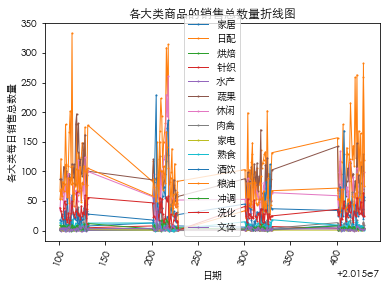

task3_2 complete


In [59]:
# df  =  pd.DataFrame(df)
print(df.columns)
data_csv_bigclass  =  df['大类名称']
print(data_csv_bigclass)
# 通过集合去重获取大类的名称
big_class_set  =  list(set(data_csv_bigclass))

# 循环分类 总表分割获取各个大类独自对应的内容
save_class  =  []
for i in range(0, len(big_class_set)):
    save_class.append(df[df['大类名称']  ==  big_class_set[i]])
data_all_list  =  []
merge_data  =  []

# 计算各个大类的每日总销售额
for i in range(0, len(big_class_set)):  # values = ['销售金额']可以获得当日销售总额
    data_all_list.append(
        pd.pivot_table(data = save_class[i], index = ['销售日期'], values = ['销售数量'], fill_value = 0, aggfunc = [np.sum, len]))
print(data_all_list)

# -----------------------画图-------------------------------
plt.rcParams['font.sans-serif']  =  ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']  =  False  # 用来正常显示负号
# 循环画图 根据类的个数
for i in range(0, len(big_class_set)):
    # 日期用sort_value()排序
    plt.plot(data_all_list[i].index.sort_values(), data_all_list[i].iloc[:, 0], label = big_class_set[i], linewidth = 1,
                marker = 'o', markerfacecolor = 'red', markersize = 1)

plt.xticks(color = 'black', rotation = 70)  # 此处locs参数与X值数组相同
plt.xlabel('日期')
plt.ylabel('各大类每日销售总数量')
# plt.asix()
plt.title('各大类商品的销售总数量折线图')
plt.legend()
plt.show()


In [28]:
# 任务 3.3 分析促销对商品销售的影响，为超市制定销售策略提供建议。

['休闲', '冲调', '家居', '家电', '文体', '日配', '洗化', '粮油', '酒饮', '针织']
[9.508054577464788, 26.523270440251565, 9.236904761904762, 22.45, 9.946666666666667, 23.366804953560372, 12.23255620316403, 20.246794701986754, 39.23987138263666, 20.635227272727274]


[7.988885510110993, 22.542592592592595, 10.917554240631166, 16.854166666666668, 7.226587301587301, 13.97185150078989, 12.49196572040707, 8.916901738620824, 26.750816582914574, 18.202764976958527]


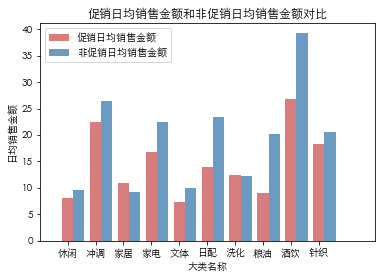

task3_3 complete


In [64]:
sale_big_type  =  df[df["是否促销"]  ==  "是"]
sale  =  pd.pivot_table(data = sale_big_type, index = ["大类名称"], values = ["销售金额"], fill_value = 0, aggfunc = [np.sum, len])
sale_name  =  list(sale.index)
print(sale_name)

sale_yes  =  []
sale_no  =  []
yes_money  =  []
no_money  =  []
for i in range(0, len(sale_name)):
    sale_yes.append(df[(df["大类名称"]  ==  sale_name[i]) & (df["是否促销"]  ==  "是")])
    riqi1  =  len(sale_yes[i]["销售日期"].to_list())
    yes_money.append(sale_yes[i]["销售金额"].sum() / riqi1)

    sale_no.append(df[(df["大类名称"]  ==  sale_name[i]) & (df["是否促销"]  ==  "否")])
    riqi2  =  len(sale_no[i]["销售日期"].to_list())
    no_money.append(sale_no[i]["销售金额"].sum() / riqi2)

print(yes_money)
print('\n')
print(no_money)

# -----------------------画图-------------------------------
plt.rcParams['font.sans-serif']  =  ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']  =  False  # 用来正常显示负号

bar_width  =  0.4
# 将X轴数据改为使用range(len(x_data), 就是0、1、2...
plt.bar(sale.index, height = no_money, label = '促销日均销售金额', color = 'indianred', alpha = 0.8, width = bar_width)
# 将X轴数据改为使用np.arange(len(x_data))+bar_width,
# 就是bar_width、1+bar_width、2+bar_width...这样就和第一个柱状图并列了
plt.bar(x = np.arange(0, 10) + bar_width, height = yes_money, label = '非促销日均销售金额', color = 'steelblue', alpha = 0.8,
        width = bar_width)

# 设置标题
plt.title("促销日均销售金额和非促销日均销售金额对比")
# 为两条坐标轴设置名称
plt.xlabel("大类名称")
plt.ylabel("日均销售金额")
plt.xlim((-1, 11))

# 显示图例
plt.legend()
plt.show()
print("task3_3 complete")
